In [1]:
import pandas as pd
import numpy as np

# The Task
- Given a list of 1000 new customers
- Determine customer trends and behavior from previous data
- Which customers should be targeted to drive most growth for the business
- Things to consider: understanding the data distributions, feature engineering, data transformations, modelling, results interpretation and reporting

# Data Exploration

In [2]:
cus_dem = pd.read_csv('CustomerDemographic.csv')
cus_dem.drop(columns = cus_dem.columns[13:], inplace = True)

In [3]:
cus_dem.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,1-Feb,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


### Examining Age and Bike Related Purchases

In [4]:
import datetime

def convert(date_time): 
    format = '%Y-%m-%d' # The format 
    datetime_str = datetime.datetime.strptime(date_time, format) 
    return datetime_str 

for date in range(len(cus_dem.DOB)):
    if isinstance(cus_dem.DOB[date], str):
        cus_dem.DOB[date] = convert(cus_dem.DOB[date])
    else:
        pass
cus_dem.DOB

<ipython-input-4-b4f99f7e9b50>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cus_dem.DOB[date] = convert(cus_dem.DOB[date])


0       1953-10-12 00:00:00
1       1980-12-16 00:00:00
2       1954-01-20 00:00:00
3       1961-10-03 00:00:00
4       1977-05-13 00:00:00
               ...         
3995    1975-08-09 00:00:00
3996    2001-07-13 00:00:00
3997                    NaN
3998    1973-10-24 00:00:00
3999    1991-11-05 00:00:00
Name: DOB, Length: 4000, dtype: object

In [5]:
cus_dem_age = cus_dem[cus_dem['DOB'].notnull()]
cus_dem_age.reset_index(inplace = True)
cus_dem_age.drop(columns = ['index'], inplace = True)

c:\users\alida\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [6]:
cus_dem_age['Year'] = 0
for point in range(len(cus_dem_age.DOB)):
    cus_dem_age.loc[point, 'Year'] = cus_dem_age.DOB[point].year

<ipython-input-6-d26815ce3b2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cus_dem_age['Year'] = 0
c:\users\alida\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Text(0.5, 1.0, 'Distribution of Year born')

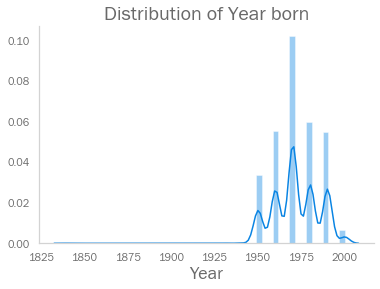

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import Plotting_settings
sns.distplot(cus_dem_age['Year'] // 10 * 10, color = "#0984e3")
plt.title('Distribution of Year born')

Text(0.5, 1.0, 'Distribution of Year Born for Females')

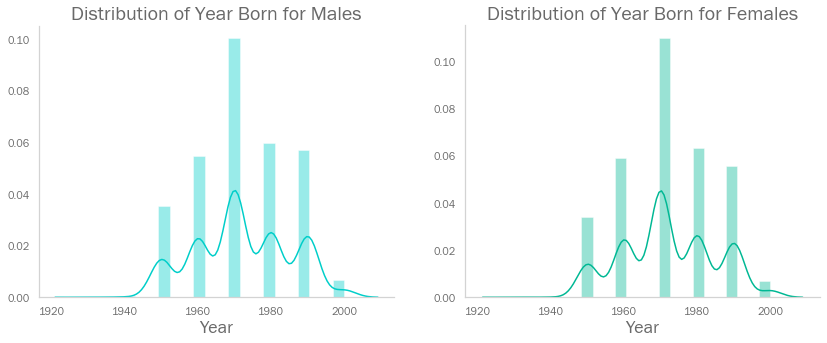

In [36]:
cus_dem_age['gender'].unique()
male = cus_dem_age[(cus_dem_age['gender'] == 'Male') | (cus_dem_age['gender'] == 'M')]
female = cus_dem_age[(cus_dem_age['gender'] == 'Female') | (cus_dem_age['gender'] == 'F') | (cus_dem_age['gender'] == 'Femal')]
f, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)
sns.distplot(male['Year'] // 10 * 10, color = "#00cec9", ax=axes[0])
axes[0].set_title('Distribution of Year Born for Males')
sns.distplot(female['Year'] // 10 * 10, color = "#00b894", ax=axes[1])
axes[1].set_title('Distribution of Year Born for Females')

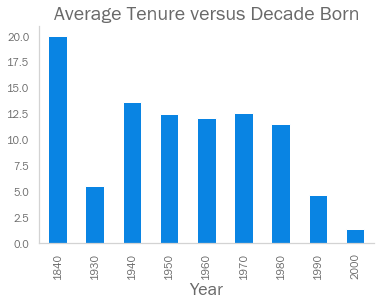

In [37]:
cus_dem_age.groupby([cus_dem_age['Year'] // 10 * 10]).mean()['tenure'].plot(kind = 'bar',
                                                                            title = 'Average Tenure versus Decade Born',
                                                                           color = '#0984e3')

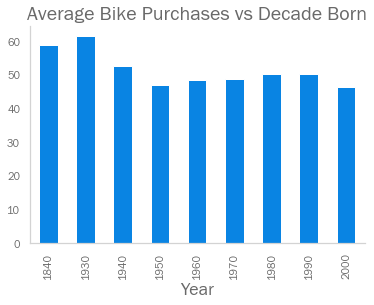

In [38]:
cus_dem_age.groupby([cus_dem_age['Year'] // 10 * 10]).mean()['past_3_years_bike_related_purchases'].plot(kind = 'bar', 
                                                                                                         title = 'Average Bike Purchases vs Decade Born',
                                                                                                        color = '#0984e3')

c:\users\alida\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


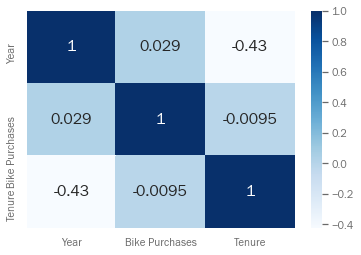

In [46]:
correlation = cus_dem_age[['Year', 'past_3_years_bike_related_purchases', 'tenure']]
correlation.rename(columns = {'past_3_years_bike_related_purchases': 'Bike Purchases', 'tenure': 'Tenure'}, inplace = True)
corrMatrix = correlation.corr()
sns.heatmap(corrMatrix, annot=True, cmap = 'Blues')
plt.show()

Text(0.5, 1.0, 'Wealth Segment vs Tenure')

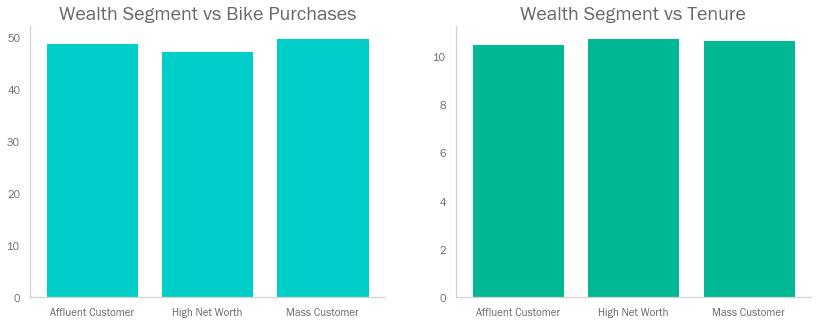

In [76]:
cus_dem_wealth = cus_dem_age[['past_3_years_bike_related_purchases', 'tenure', 'wealth_segment']]
cus_dem_wealth = cus_dem_wealth.rename(columns = {'past_3_years_bike_related_purchases': 'Bike Purchases', 'tenure': 'Tenure',
                                'wealth_segment': 'Wealth'})
wealth = cus_dem_wealth.groupby(['Wealth']).mean()
f, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)
axes[0].bar(wealth.index, wealth['Bike Purchases'], color = '#00cec9')
axes[0].set_title('Wealth Segment vs Bike Purchases')
axes[1].bar(wealth.index, wealth['Tenure'], color = '#00b894')
axes[1].set_title('Wealth Segment vs Tenure')

In [105]:
transactions = pd.read_csv('Transactions.csv')
t = transactions['customer_id'].value_counts()
tran = pd.DataFrame(data = t.values, index = t.index, columns = ['Number of Purchases'])
c = cus_dem_age.set_index('customer_id').join(tran)
c = c[['DOB', 'tenure', 'past_3_years_bike_related_purchases', 'Number of Purchases']]
c.dropna(inplace = True)

In [106]:
c

,DOB,tenure,past_3_years_bike_related_purchases,Number of Purchases
customer_id,,,,
1,1953-10-12 00:00:00,11.0,93,11.0
2,1980-12-16 00:00:00,16.0,81,3.0
3,1954-01-20 00:00:00,15.0,61,8.0
4,1961-10-03 00:00:00,7.0,33,2.0
5,1977-05-13 00:00:00,8.0,56,6.0
...,...,...,...,...
3496,1986-04-25 00:00:00,19.0,99,4.0
3497,1986-05-03 00:00:00,18.0,73,3.0
3498,1995-11-02 00:00:00,5.0,28,6.0


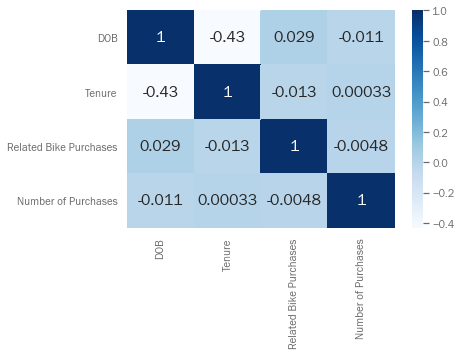

In [109]:
c.rename(columns = {'tenure': 'Tenure', 'past_3_years_bike_related_purchases': 'Related Bike Purchases'}, inplace = True)
c['DOB'] = [i.year for i in c['DOB']]
corrMatrix = c.corr()
sns.heatmap(corrMatrix, annot=True, cmap = 'Blues')
plt.show()